# EdcellenceEdPEx: ADLI-LeTCI Computational Framework
## Complete Framework Demonstration with 2D and 3D Visualizations

**Authors:** Rungtiva Saosing, Chatchai Tritham, Chattabhorn Tritham, Sudasawan Ngammongkolwong
Faculty of Science and Technology, Rajamangala University of Technology Krungthep

**Reference:** Saosing et al. (2026). IEEE ACCESS.

---

| Category | Domain | Weight |
|----------|--------|--------|
| 1. Leadership | Process (ADLI) | 12% |
| 2. Strategy | Process (ADLI) | 8.5% |
| 3. Customers | Process (ADLI) | 8.5% |
| 4. Measurement | Process (ADLI) | 9% |
| 5. Workforce | Process (ADLI) | 8.5% |
| 6. Operations | Process (ADLI) | 8.5% |
| 7. Results | Results (LeTCI) | **45%** |

In [1]:
import sys, os, json, warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['savefig.dpi'] = 300
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

notebook_dir = os.getcwd()
repo_root = os.path.dirname(notebook_dir)
sys.path.insert(0, os.path.join(repo_root, 'src'))

from algorithms.organizational_scoring import OrganizationalScorer
from visualizations.scoring_visualizer import ScoringVisualizer

os.makedirs(os.path.join(repo_root, 'outputs'), exist_ok=True)
scorer = OrganizationalScorer()
viz = ScoringVisualizer()

data_path = os.path.join(repo_root, 'data', 'sample', 'organizational_data.json')
with open(data_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

print('[OK] Framework modules loaded')
print(f'Organization: {data["organization"]["name"]}')

INFO:algorithms.organizational_scoring:OrganizationalScorer initialized successfully


[OK] Framework modules loaded
Organization: Rajamangala University of Technology Krungthep


## Section 1: ADLI Process Scoring

ADLI weights: Approach 30% | Deployment 30% | Learning 20% | Integration 20%

In [2]:
result = scorer.compute_item_score(
    category=2, item_id=3,
    indicators={'P_A': 0.75, 'P_D': 0.45, 'P_L': 0.60, 'P_I': 0.55}
)
maturity = scorer._compute_maturity_level(result.score)
print(f'ADLI Score : {result.score:.1f}/100')
print(f'Maturity   : {maturity}')
print(f'Breakdown  : {result.breakdown}')

ADLI Score : 59.0/100
Maturity   : Emerging - Beginning systematic approach
Breakdown  : {'Approach': 22.5, 'Deployment': 13.5, 'Learning': 12.0, 'Integration': 11.0, 'Total': 59.0}


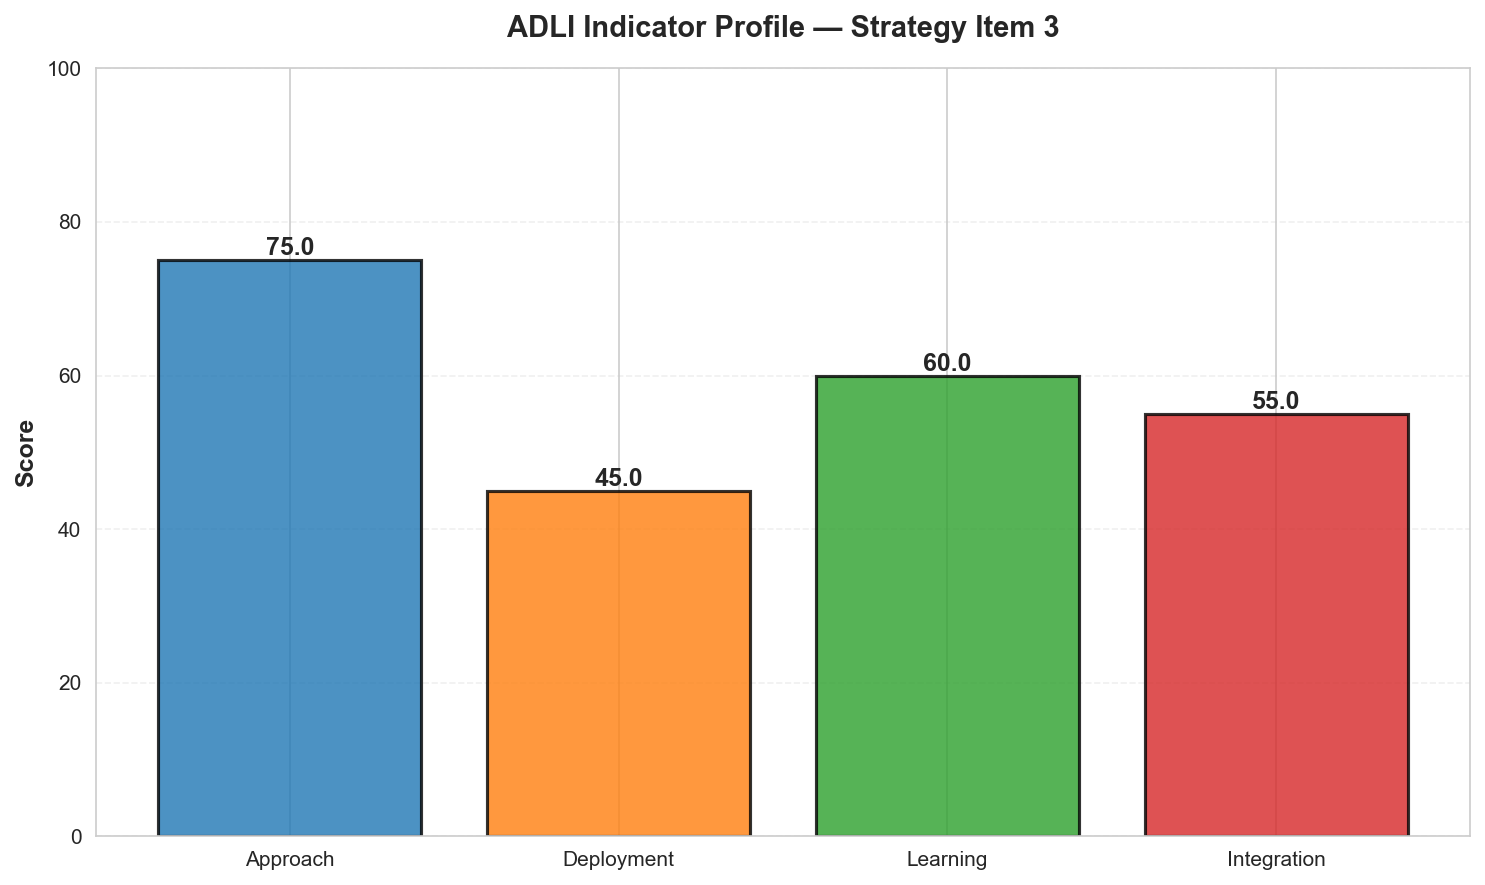

[OK] ADLI chart


In [3]:
adli_scores = {'Approach': 75.0, 'Deployment': 45.0, 'Learning': 60.0, 'Integration': 55.0}
fig = viz.plot_adli_breakdown(
    adli_scores,
    title='ADLI Indicator Profile — Strategy Item 3',
    save_path=os.path.join(repo_root, 'outputs', 'nb_01_adli.png')
)
plt.show()
print('[OK] ADLI chart')

## Section 2: LeTCI Results Scoring

LeTCI weights: Levels 35% | Trends 25% | Comparisons 25% | Integration 15%

In [4]:
result_l = scorer.compute_item_score(
    category=7, item_id=1,
    indicators={'R_Lv': 0.85, 'R_Tr': 0.90, 'R_Cp': 0.75, 'R_I': 0.70}
)
maturity_l = scorer._compute_maturity_level(result_l.score)
print(f'LeTCI Score: {result_l.score:.1f}/100')
print(f'Maturity   : {maturity_l}')
historical = [70, 75, 80, 85, 90]
slope, _ = np.polyfit(range(len(historical)), historical, 1)
print(f'Trend      : {slope:.1f} pts/year (Improving)')

LeTCI Score: 81.5/100
Maturity   : Mature - Strong systematic approach
Trend      : 5.0 pts/year (Improving)


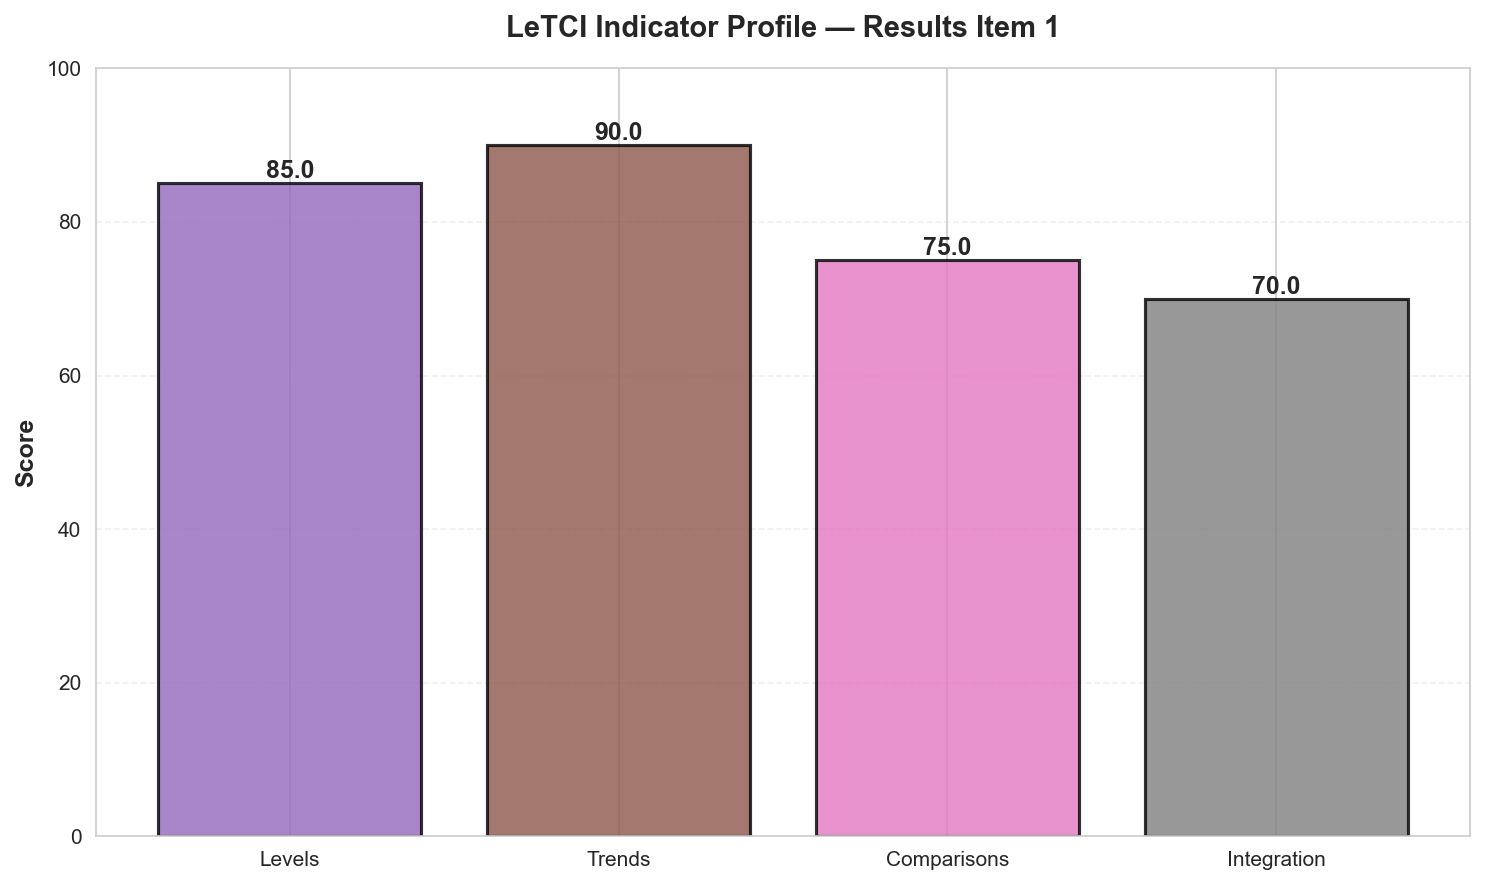

[OK] LeTCI chart


In [5]:
letci_scores = {'Levels': 85.0, 'Trends': 90.0, 'Comparisons': 75.0, 'Integration': 70.0}
fig = viz.plot_letci_breakdown(
    letci_scores,
    title='LeTCI Indicator Profile — Results Item 1',
    save_path=os.path.join(repo_root, 'outputs', 'nb_02_letci.png')
)
plt.show()
print('[OK] LeTCI chart')

## Section 3: Organizational-Level Scoring

In [6]:
cat_names = {1:'Leadership',2:'Strategy',3:'Customers',4:'Measurement',
             5:'Workforce',6:'Operations',7:'Results'}
category_scores = {}
for cid_str, cdata in data['categories'].items():
    cid = int(cid_str)
    if 'items' in cdata:
        category_scores[cid] = np.mean([i['score'] for i in cdata['items'].values()])

org_result   = scorer.compute_organizational_score(category_scores)
ihi          = scorer.compute_integration_health_index(category_scores)
scorecard    = scorer.generate_scorecard(category_scores, include_ihi=True)
org_maturity = scorer._compute_maturity_level(org_result.score)

print(f'Overall Score : {org_result.score:.1f}/100')
print(f'Maturity      : {org_maturity}')
print(f'Confidence    : {org_result.confidence:.3f}')
print(f'IHI           : {ihi:.3f}')
print()
for cid, score in sorted(category_scores.items()):
    print(f'  {cid}. {cat_names[cid]:<14}: {score:.1f}')

Overall Score : 74.9/100
Maturity      : Developing - Early systematic approach
Confidence    : 0.946
IHI           : 0.919

  1. Leadership    : 75.0
  2. Strategy      : 64.7
  3. Customers     : 82.3
  4. Measurement   : 70.0
  5. Workforce     : 75.0
  6. Operations    : 69.3
  7. Results       : 87.7


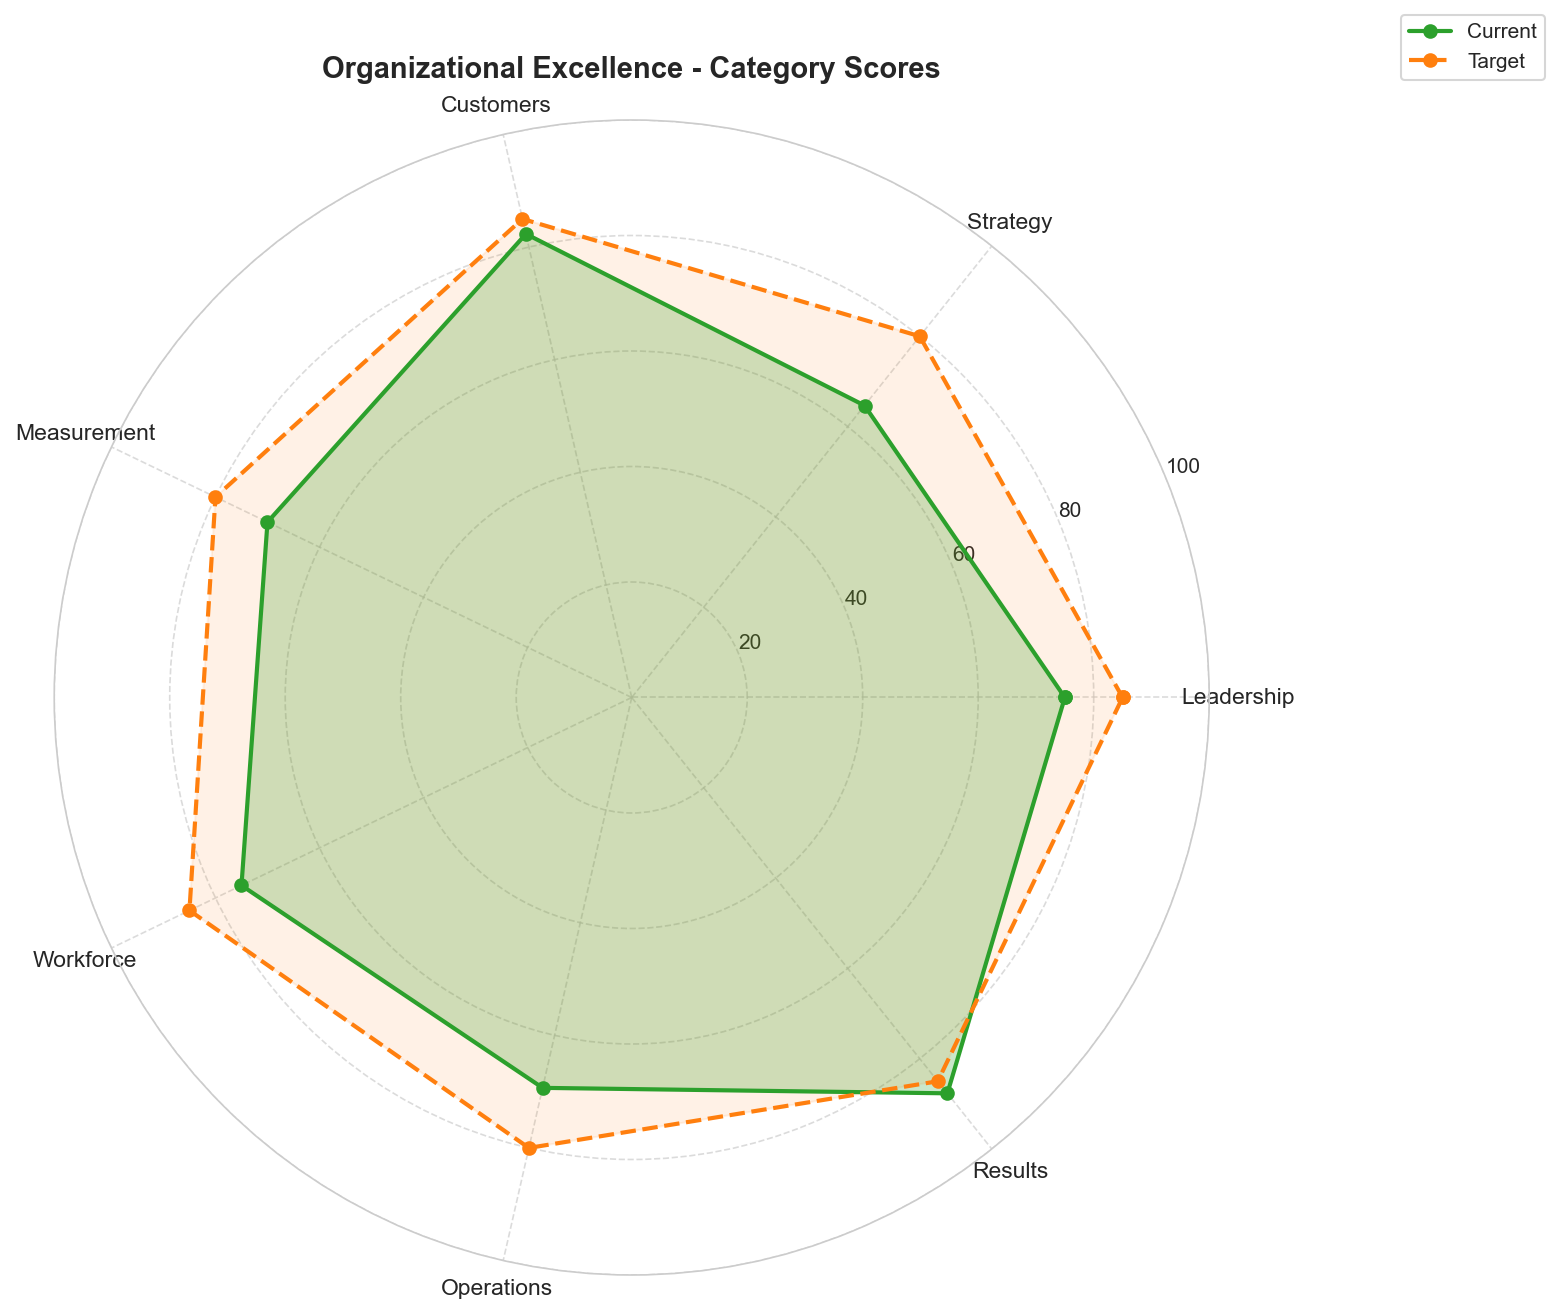

[OK] Radar chart


In [7]:
target_scores = {1:85, 2:80, 3:85, 4:80, 5:85, 6:80, 7:85}
fig = viz.plot_category_scores_radar(
    category_scores, target_scores=target_scores,
    save_path=os.path.join(repo_root, 'outputs', 'nb_03_radar.png')
)
plt.show()
print('[OK] Radar chart')

## Section 4: Gap Analysis

In [8]:
current_nested = {}
target_nested  = {}
targets_2025   = data.get('targets_2025', {})
for cid_str, cdata in data['categories'].items():
    cid = int(cid_str)
    t   = float(targets_2025.get(cid_str, 80))
    current_nested[cid] = {}
    target_nested[cid]  = {}
    for iid_str, idata in cdata.get('items', {}).items():
        iid = int(iid_str)
        current_nested[cid][iid] = idata['score']
        target_nested[cid][iid]  = t

gap_df = scorer.compute_gap_analysis(current_nested, target_nested)
cols = ['category','item','current_score','target_score','gap','priority','status']
print('Top 10 Priorities:')
print(gap_df[cols].head(10).to_string(index=False))

Top 10 Priorities:
 category  item  current_score  target_score  gap  priority   status
        2     2           59.0          80.0 21.0      5.25 Critical
        2     1           65.0          80.0 15.0      3.75  Monitor
        1     2           72.0          85.0 13.0      3.25  Monitor
        6     3           68.0          80.0 12.0      3.00  Monitor
        4     1           68.0          80.0 12.0      3.00  Monitor
        6     1           69.0          80.0 11.0      2.75  Monitor
        5     1           74.0          85.0 11.0      2.75  Monitor
        5     3           75.0          85.0 10.0      2.50 On Track
        1     1           75.0          85.0 10.0      2.50 On Track
        4     3           70.0          80.0 10.0      2.50 On Track


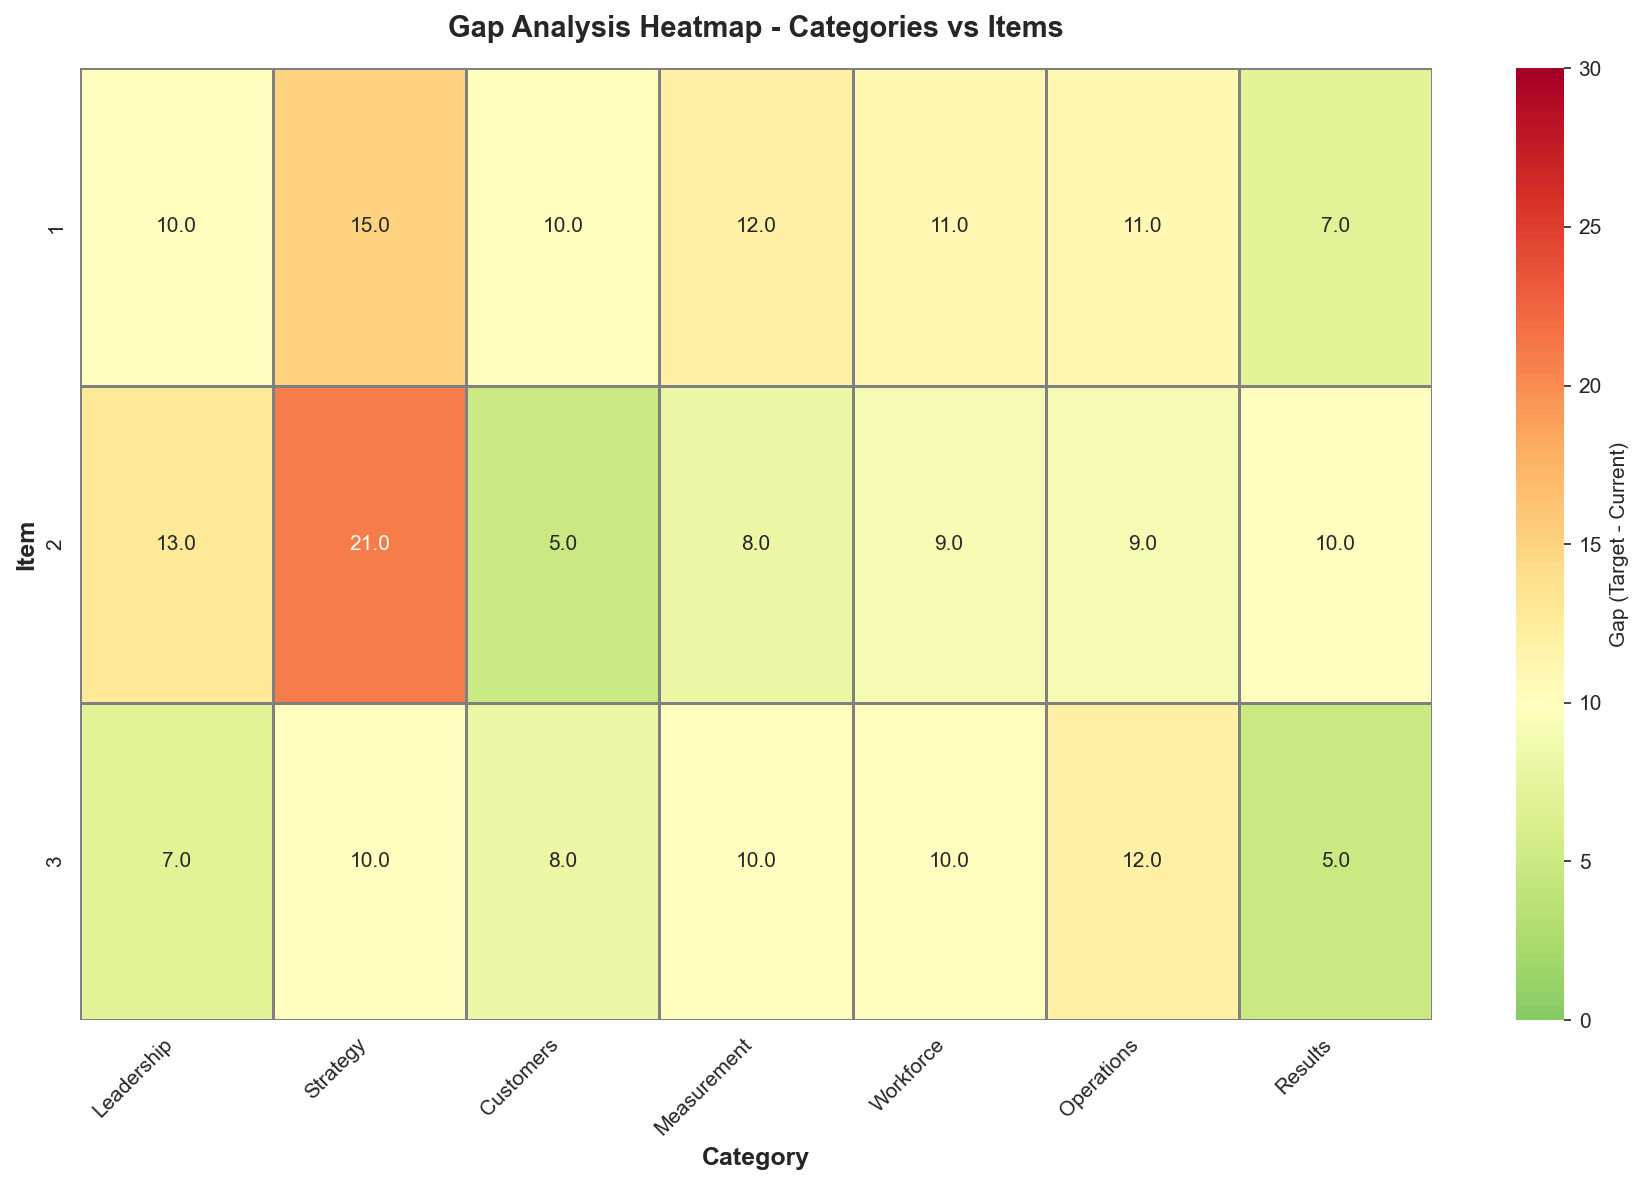

[OK] Gap heatmap


In [9]:
fig = viz.plot_gap_analysis_heatmap(
    gap_df,
    save_path=os.path.join(repo_root, 'outputs', 'nb_04_gap_heatmap.png')
)
plt.show()
print('[OK] Gap heatmap')

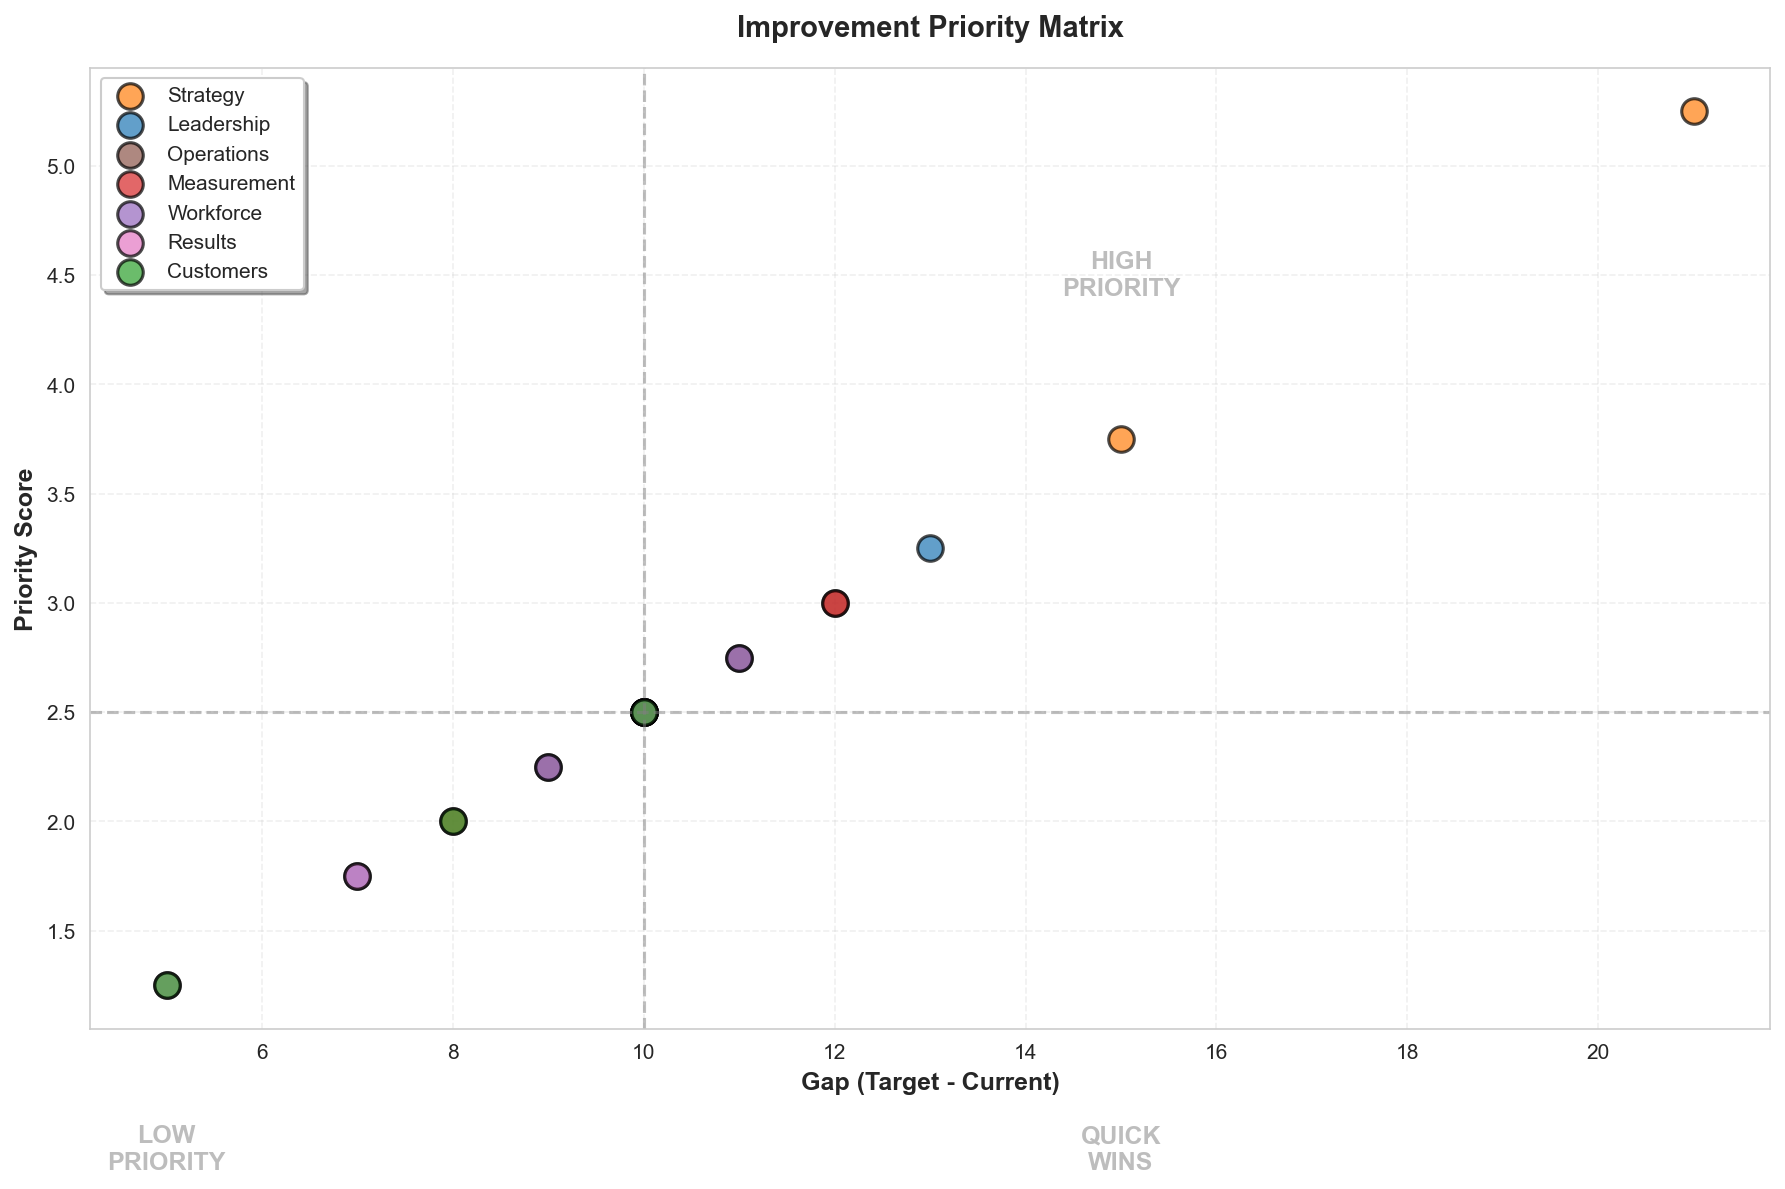

[OK] Priority matrix


In [10]:
fig = viz.plot_priority_matrix(
    gap_df,
    save_path=os.path.join(repo_root, 'outputs', 'nb_05_priority_matrix.png')
)
plt.show()
print('[OK] Priority matrix')

## Section 5: 3D Category Performance Surface

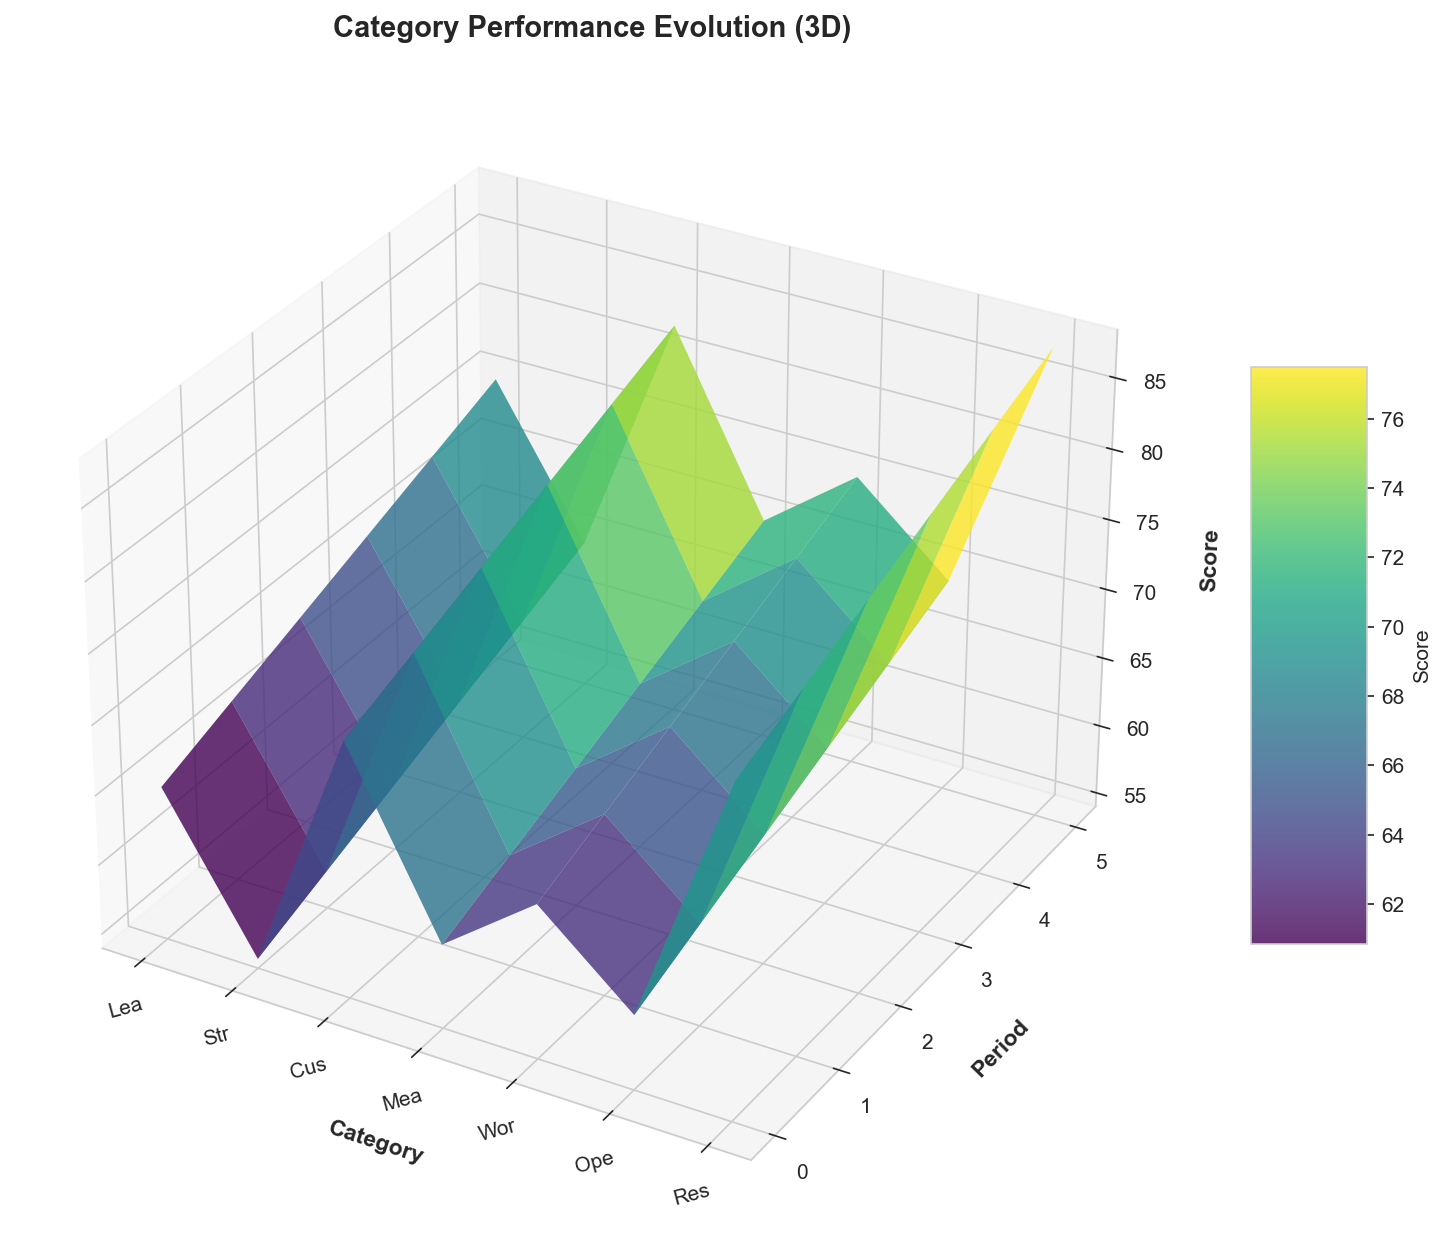

[OK] 3D performance surface


In [11]:
years = ['2020','2021','2022','2023','2024','2025']
historical_data = {}
for yi, year in enumerate(years):
    historical_data[year] = {}
    for cid_str, cdata in data['categories'].items():
        cid = int(cid_str)
        if 'historical' in cdata and yi < len(cdata['historical']):
            historical_data[year][cid] = cdata['historical'][yi]
        else:
            historical_data[year][cid] = category_scores.get(cid, 70) - (5 - yi) * 2

fig = viz.plot_3d_category_surface(
    historical_data,
    save_path=os.path.join(repo_root, 'outputs', 'nb_06_3d_surface.png')
)
plt.show()
print('[OK] 3D performance surface')

## Section 6: Interactive Scorecard (Plotly)

In [12]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
fig_i = viz.create_interactive_scorecard(
    scorecard,
    save_path=os.path.join(repo_root, 'outputs', 'nb_07_interactive_scorecard.html')
)
fig_i.show()
print('[OK] Interactive scorecard (also saved as HTML)')

[OK] Interactive scorecard (also saved as HTML)


## Section 7: Trend Analysis (2020-2025)

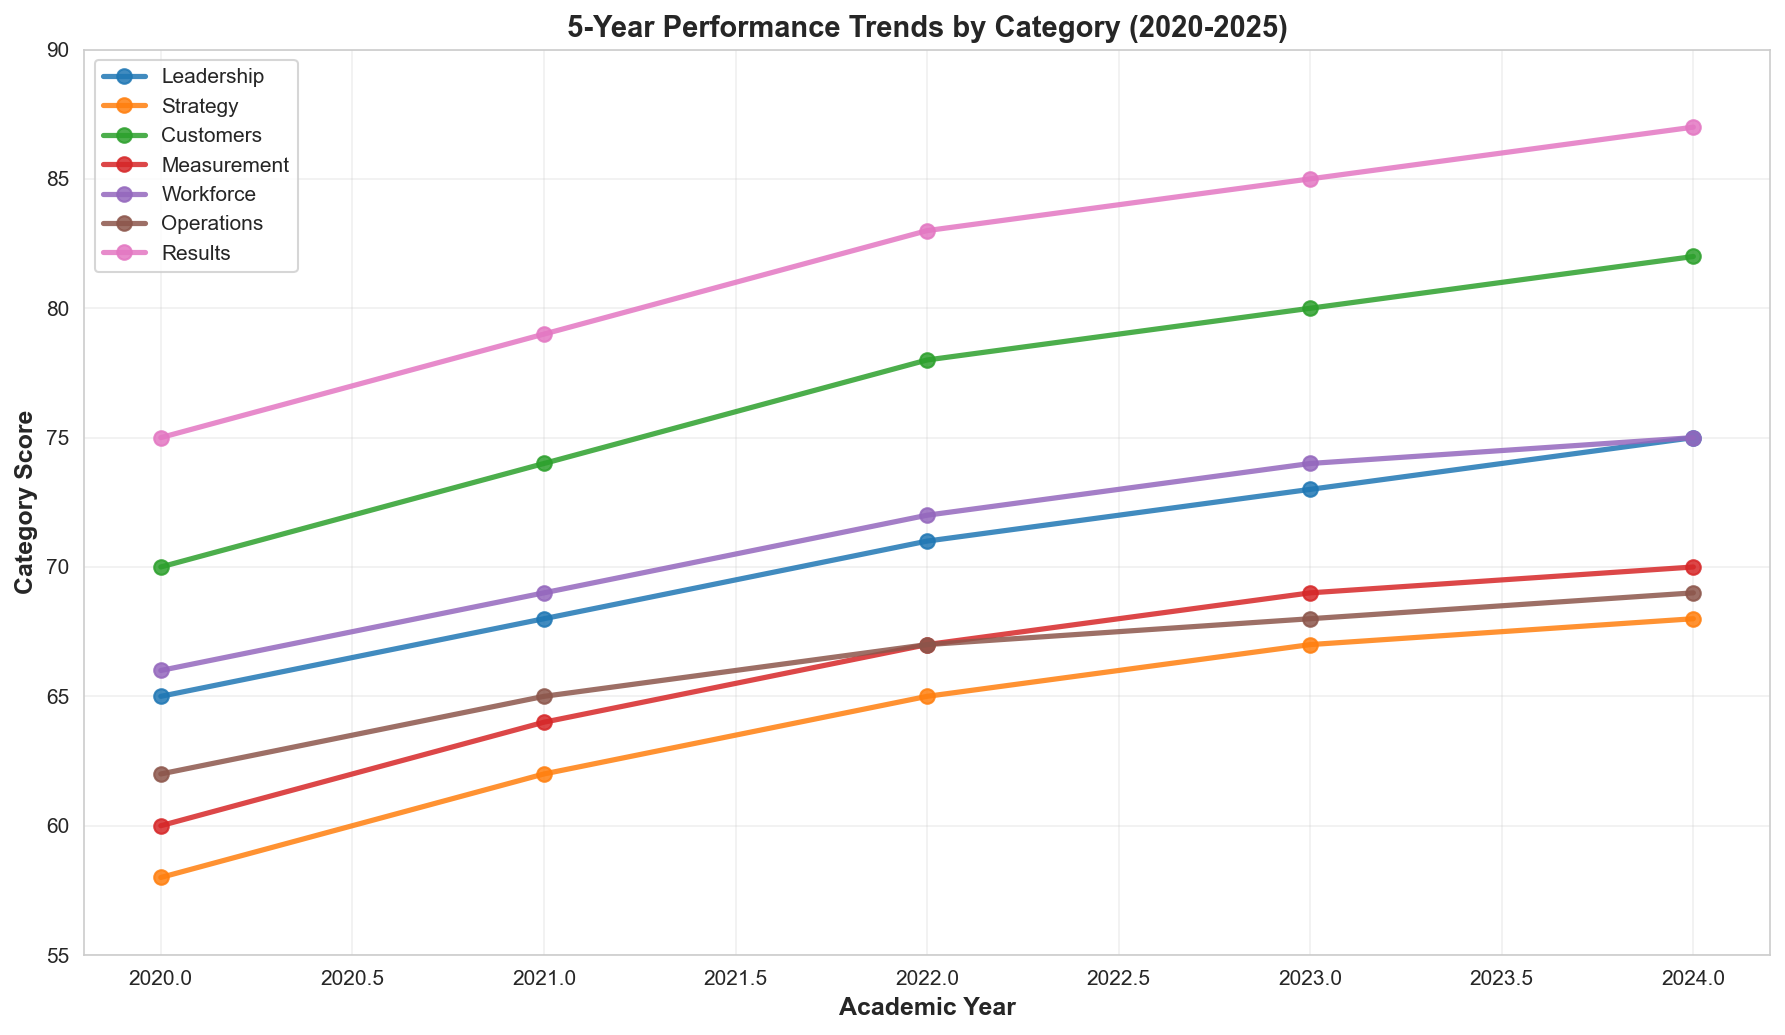

[OK] Trend analysis chart saved to D:\2026-Journal\Rung\GitHub\EdcellenceEdPEx\outputs\nb_08_trends.png


In [13]:
# Extract trend data from historical_trends section and plot all categories
if 'historical_trends' in data:
    # historical_trends format: {'2020-2021': {cid: score}, ...}
    periods = sorted(data['historical_trends'].keys())
    years = [int(p.split('-')[0]) for p in periods]

    # Create multi-category trend chart
    fig, ax = plt.subplots(figsize=(12, 7))

    for cid in range(1, 8):
        scores = [data['historical_trends'][p].get(str(cid), 70) for p in periods]
        ax.plot(years, scores, marker='o', linewidth=2.5, markersize=7,
                label=cat_names[cid], alpha=0.85)

    ax.set_xlabel('Academic Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Category Score', fontsize=12, fontweight='bold')
    ax.set_title('5-Year Performance Trends by Category (2020-2025)', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(55, 90)
    plt.tight_layout()
    save_path = os.path.join(repo_root, 'outputs', 'nb_08_trends.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f'[OK] Trend analysis chart saved to {save_path}')
else:
    print('No historical data available')

## Section 8: Statistical Validation Results

Empirical validation from 24 organizational units, Academic Year 2024-2025

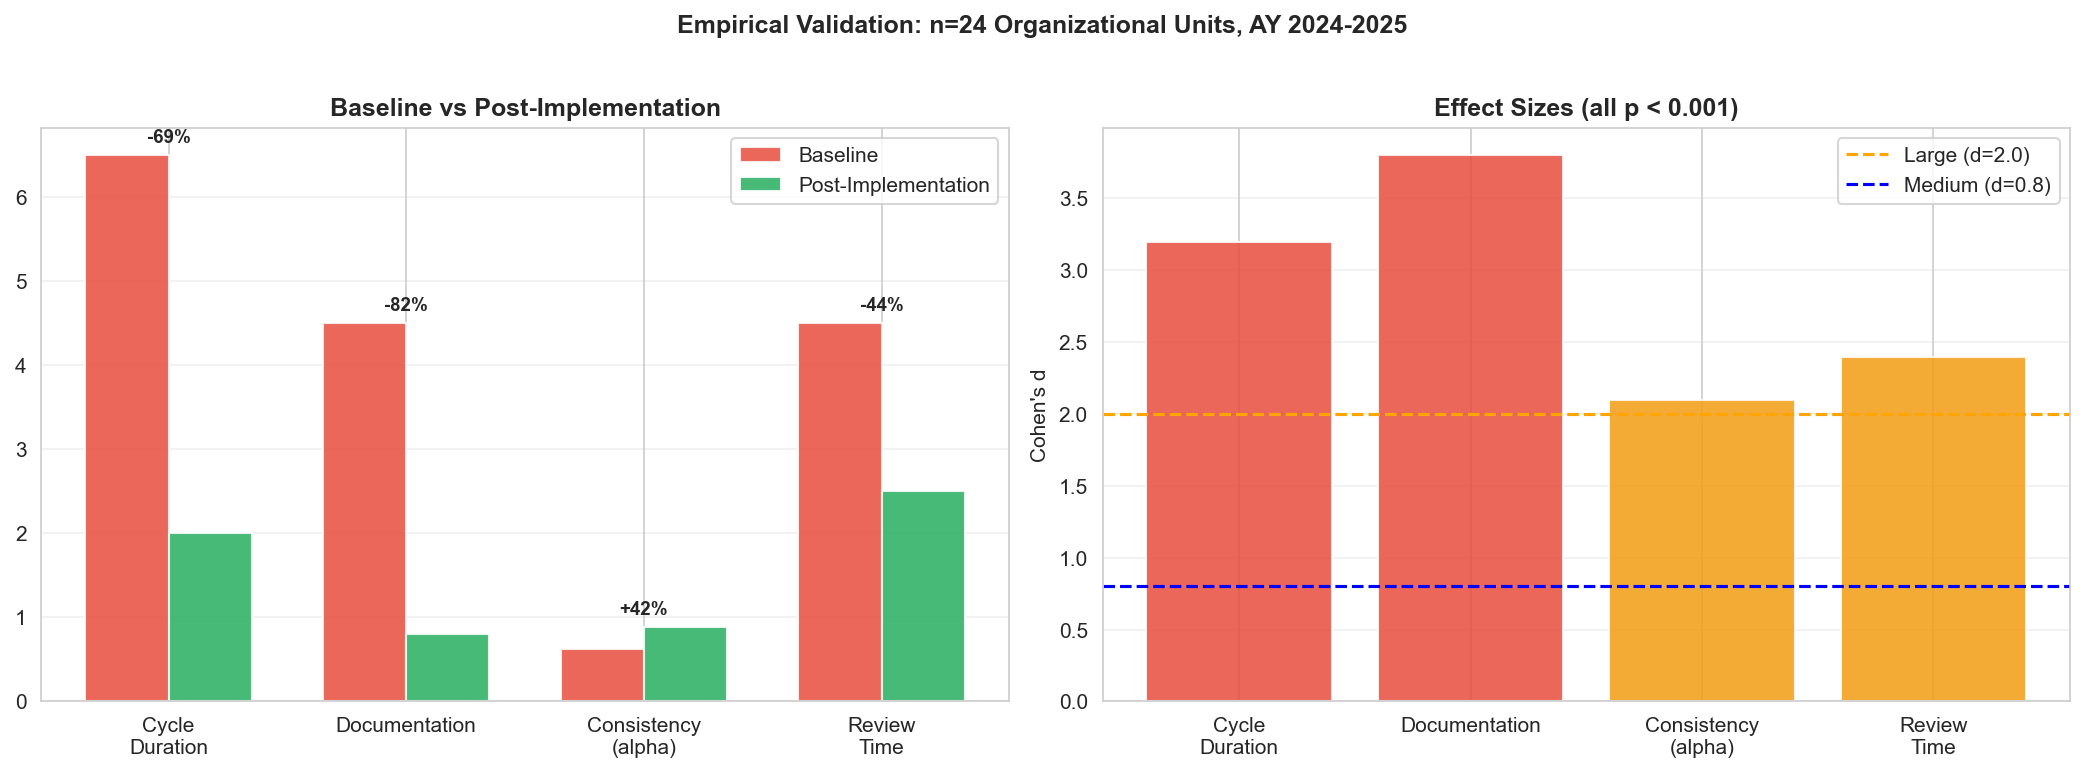

             Metric  Baseline Post-Impl Change p-value   Cohen's d
   Assessment Cycle 6.5 weeks 2.0 weeks   -69%  <0.001 3.2 (large)
      Documentation  450 docs   80 docs   -82%  <0.001 3.8 (large)
Consistency (alpha)      0.62      0.88   +42%  <0.001 2.1 (large)
    Review Duration   4.5 hrs   2.5 hrs   -44%  <0.001 2.4 (large)


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics   = ['Cycle\nDuration', 'Documentation', 'Consistency\n(alpha)', 'Review\nTime']
baseline  = [6.5, 4.5, 0.62, 4.5]
post_impl = [2.0, 0.8, 0.88, 2.5]
changes   = ['-69%', '-82%', '+42%', '-44%']
effect_d  = [3.2, 3.8, 2.1, 2.4]

x = np.arange(len(metrics))
w = 0.35
axes[0].bar(x - w/2, baseline,  w, label='Baseline',            color='#e74c3c', alpha=0.85)
axes[0].bar(x + w/2, post_impl, w, label='Post-Implementation',  color='#27ae60', alpha=0.85)
for xi, (b, p, ch) in enumerate(zip(baseline, post_impl, changes)):
    axes[0].text(xi, max(b, p) + 0.15, ch, ha='center', fontsize=9, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].set_title('Baseline vs Post-Implementation', fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

colors_d = ['#e74c3c' if d > 2.5 else '#f39c12' for d in effect_d]
axes[1].bar(metrics, effect_d, color=colors_d, alpha=0.85)
axes[1].axhline(2.0, color='orange', ls='--', label='Large (d=2.0)')
axes[1].axhline(0.8, color='blue',   ls='--', label='Medium (d=0.8)')
axes[1].set_title("Effect Sizes (all p < 0.001)", fontweight='bold')
axes[1].set_ylabel("Cohen's d")
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Empirical Validation: n=24 Organizational Units, AY 2024-2025',
             fontsize=12, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(repo_root, 'outputs', 'nb_09_validation.png'), dpi=300, bbox_inches='tight')
plt.show()

df_val = pd.DataFrame({
    'Metric': ['Assessment Cycle', 'Documentation', 'Consistency (alpha)', 'Review Duration'],
    'Baseline': ['6.5 weeks', '450 docs', '0.62', '4.5 hrs'],
    'Post-Impl': ['2.0 weeks', '80 docs', '0.88', '2.5 hrs'],
    'Change': ['-69%', '-82%', '+42%', '-44%'],
    'p-value': ['<0.001', '<0.001', '<0.001', '<0.001'],
    "Cohen's d": ['3.2 (large)', '3.8 (large)', '2.1 (large)', '2.4 (large)']
})
print(df_val.to_string(index=False))

---
## Summary

| Section | Visualization | File |
|---------|--------------|------|
| ADLI scoring | Indicator bar chart | nb_01_adli.png |
| LeTCI scoring | Indicator bar chart | nb_02_letci.png |
| Radar chart | Current vs Target | nb_03_radar.png |
| Gap analysis | Heatmap | nb_04_gap_heatmap.png |
| Priorities | Priority matrix | nb_05_priority_matrix.png |
| 3D surface | Category evolution | nb_06_3d_surface.png |
| Dashboard | Interactive scorecard | nb_07_interactive_scorecard.html |
| Trends | Time series | nb_08_trends.png |
| Validation | Effect sizes | nb_09_validation.png |

**Citation:**
```
Saosing, R., Tritham, C., Tritham, C., & Ngammongkolwong, S. (2026).
From Excellence Guidelines to Computable Performance Systems.
IEEE ACCESS.
```